In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import math


In [14]:

start_date = dt.datetime(2020,4,1)
end_date = dt.datetime(2023,4,1)

data = yf.download("GOOGL",start_date, end_date)

pd.set_option('display.max_rows', 4)
pd.set_option('display.max_columns',5)
print(data)


[*********************100%%**********************]  1 of 1 completed

                  Open        High  ...   Adj Close    Volume
Date                                ...                      
2020-04-01   56.200001   56.471001  ...   55.105000  51970000
2020-04-02   55.000000   56.138500  ...   55.851501  56410000
...                ...         ...  ...         ...       ...
2023-03-30  100.910004  101.160004  ...  100.889999  33086200
2023-03-31  101.300003  103.889999  ...  103.730003  36863400

[756 rows x 6 columns]


In [15]:

training_data_len = math.ceil(len(data) * .8)
training_data_len


train_data = data[:training_data_len].iloc[:,:1]
test_data = data[training_data_len:].iloc[:,:1]
print(train_data.shape, test_data.shape)


(605, 1) (151, 1)


In [16]:

dataset_train = train_data.Open.values

dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape


(605, 1)

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

scaled_train = scaler.fit_transform(dataset_train)

print(scaled_train[:5])


[[0.01246754]
 [0.        ]
 [0.00764156]
 [0.01714287]
 [0.0607844 ]]


In [18]:
# Selecting Open Price values
dataset_test = test_data.Open.values
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1))
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)
print(*scaled_test[:5])


[0.98362881] [1.] [0.83867656] [0.84481572] [0.86118691]


In [19]:
X_train = []
y_train = []
for i in range(50, len(scaled_train)):
	X_train.append(scaled_train[i-50:i, 0])
	y_train.append(scaled_train[i, 0])
	if i <= 51:
		print(X_train)
		print(y_train)
		print()


[array([0.01246754, 0.        , 0.00764156, 0.01714287, 0.0607844 ,
       0.05355843, 0.06139221, 0.05272728, 0.0727117 , 0.0761091 ,
       0.08682596, 0.0943896 , 0.08825454, 0.07413508, 0.0733039 ,
       0.08609869, 0.08051948, 0.09974024, 0.09516887, 0.12727273,
       0.12018702, 0.11641037, 0.1081195 , 0.12337662, 0.13402599,
       0.13574544, 0.14640004, 0.14378702, 0.16011432, 0.14345973,
       0.12130912, 0.12896625, 0.13588574, 0.14830132, 0.15021299,
       0.16155324, 0.15787013, 0.17764155, 0.16623377, 0.15584416,
       0.16645714, 0.16919484, 0.17402597, 0.178026  , 0.17495062,
       0.16396881, 0.16949613, 0.17934547, 0.18779741, 0.17715843])]
[0.16927791446834417]

[array([0.01246754, 0.        , 0.00764156, 0.01714287, 0.0607844 ,
       0.05355843, 0.06139221, 0.05272728, 0.0727117 , 0.0761091 ,
       0.08682596, 0.0943896 , 0.08825454, 0.07413508, 0.0733039 ,
       0.08609869, 0.08051948, 0.09974024, 0.09516887, 0.12727273,
       0.12018702, 0.11641037, 0.10

In [20]:
X_test = []
y_test = []
for i in range(50, len(scaled_test)):
	X_test.append(scaled_test[i-50:i, 0])
	y_test.append(scaled_test[i, 0])


In [21]:
# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)


X_train : (555, 50, 1) y_train : (555, 1)


In [22]:
# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)

#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)


X_test : (101, 50, 1) y_test : (101, 1)


In [23]:
# importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error


In [30]:
from tensorflow.keras.optimizers import SGD

In [32]:
# initializing the RNN
regressor = Sequential()

# adding RNN layers and dropout regularization
regressor.add(SimpleRNN(units = 50,
						activation = "tanh",
						return_sequences = True,
						input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50,
						activation = "tanh",
						return_sequences = True))

regressor.add(SimpleRNN(units = 50,
						activation = "tanh",
						return_sequences = True))

regressor.add( SimpleRNN(units = 50))

# adding the output layer
regressor.add(Dense(units = 1,activation='sigmoid'))

# compiling RNN
regressor.compile(optimizer = SGD(learning_rate=0.01,
								momentum=0.9,
								nesterov=True),
				loss = "mean_squared_error")

# fitting the model
regressor.fit(X_train, y_train, epochs = 20, batch_size = 2)
regressor.summary()


Epoch 1/20
278/278 [==============================] - 13s 35ms/step - loss: 0.0130
Epoch 2/20
278/278 [==============================] - 9s 32ms/step - loss: 0.0037
Epoch 3/20
278/278 [==============================] - 9s 32ms/step - loss: 0.0032
Epoch 4/20
278/278 [==============================] - 11s 39ms/step - loss: 0.0029
Epoch 5/20
278/278 [==============================] - 10s 34ms/step - loss: 0.0026
Epoch 6/20
278/278 [==============================] - 8s 30ms/step - loss: 0.0024
Epoch 7/20
278/278 [==============================] - 9s 34ms/step - loss: 0.0023
Epoch 8/20
278/278 [==============================] - 10s 34ms/step - loss: 0.0025
Epoch 9/20
278/278 [==============================] - 9s 33ms/step - loss: 0.0022
Epoch 10/20
278/278 [==============================] - 9s 32ms/step - loss: 0.0021
Epoch 11/20
278/278 [==============================] - 10s 36ms/step - loss: 0.0019
Epoch 12/20
278/278 [==============================] - 10s 34ms/step - loss: 0.0020
Epoch 1

In [33]:
#Initialising the model
regressorLSTM = Sequential()

#Adding LSTM layers
regressorLSTM.add(LSTM(50,
					return_sequences = True,
					input_shape = (X_train.shape[1],1)))
regressorLSTM.add(LSTM(50,
					return_sequences = False))
regressorLSTM.add(Dense(25))

#Adding the output layer
regressorLSTM.add(Dense(1))

#Compiling the model
regressorLSTM.compile(optimizer = 'adam',
					loss = 'mean_squared_error',
					metrics = ["accuracy"])

#Fitting the model
regressorLSTM.fit(X_train,
				y_train,
				batch_size = 1,
				epochs = 12)
regressorLSTM.summary()


Epoch 1/12
555/555 [==============================] - 17s 21ms/step - loss: 0.0063 - accuracy: 0.0018
Epoch 2/12
555/555 [==============================] - 13s 23ms/step - loss: 0.0023 - accuracy: 0.0018
Epoch 3/12
555/555 [==============================] - 12s 21ms/step - loss: 0.0022 - accuracy: 0.0018
Epoch 4/12
555/555 [==============================] - 12s 21ms/step - loss: 0.0021 - accuracy: 0.0018
Epoch 5/12
555/555 [==============================] - 13s 23ms/step - loss: 0.0014 - accuracy: 0.0018
Epoch 6/12
555/555 [==============================] - 13s 24ms/step - loss: 0.0013 - accuracy: 0.0018
Epoch 7/12
555/555 [==============================] - 13s 23ms/step - loss: 0.0012 - accuracy: 0.0018
Epoch 8/12
555/555 [==============================] - 12s 21ms/step - loss: 0.0013 - accuracy: 0.0018
Epoch 9/12
555/555 [==============================] - 20s 36ms/step - loss: 9.6354e-04 - accuracy: 0.0018
Epoch 10/12
555/555 [==============================] - 13s 24ms/step - loss: 9

In [35]:
# predictions with X_test data
y_RNN = regressor.predict(X_test)
y_LSTM = regressorLSTM.predict(X_test)
y_GRU = regressorGRU.predict(X_test)


4/4 [==============================] - 1s 18ms/step


In [36]:
# scaling back from 0-1 to original
y_RNN_O = scaler.inverse_transform(y_RNN)
y_LSTM_O = scaler.inverse_transform(y_LSTM)
y_GRU_O = scaler.inverse_transform(y_GRU)


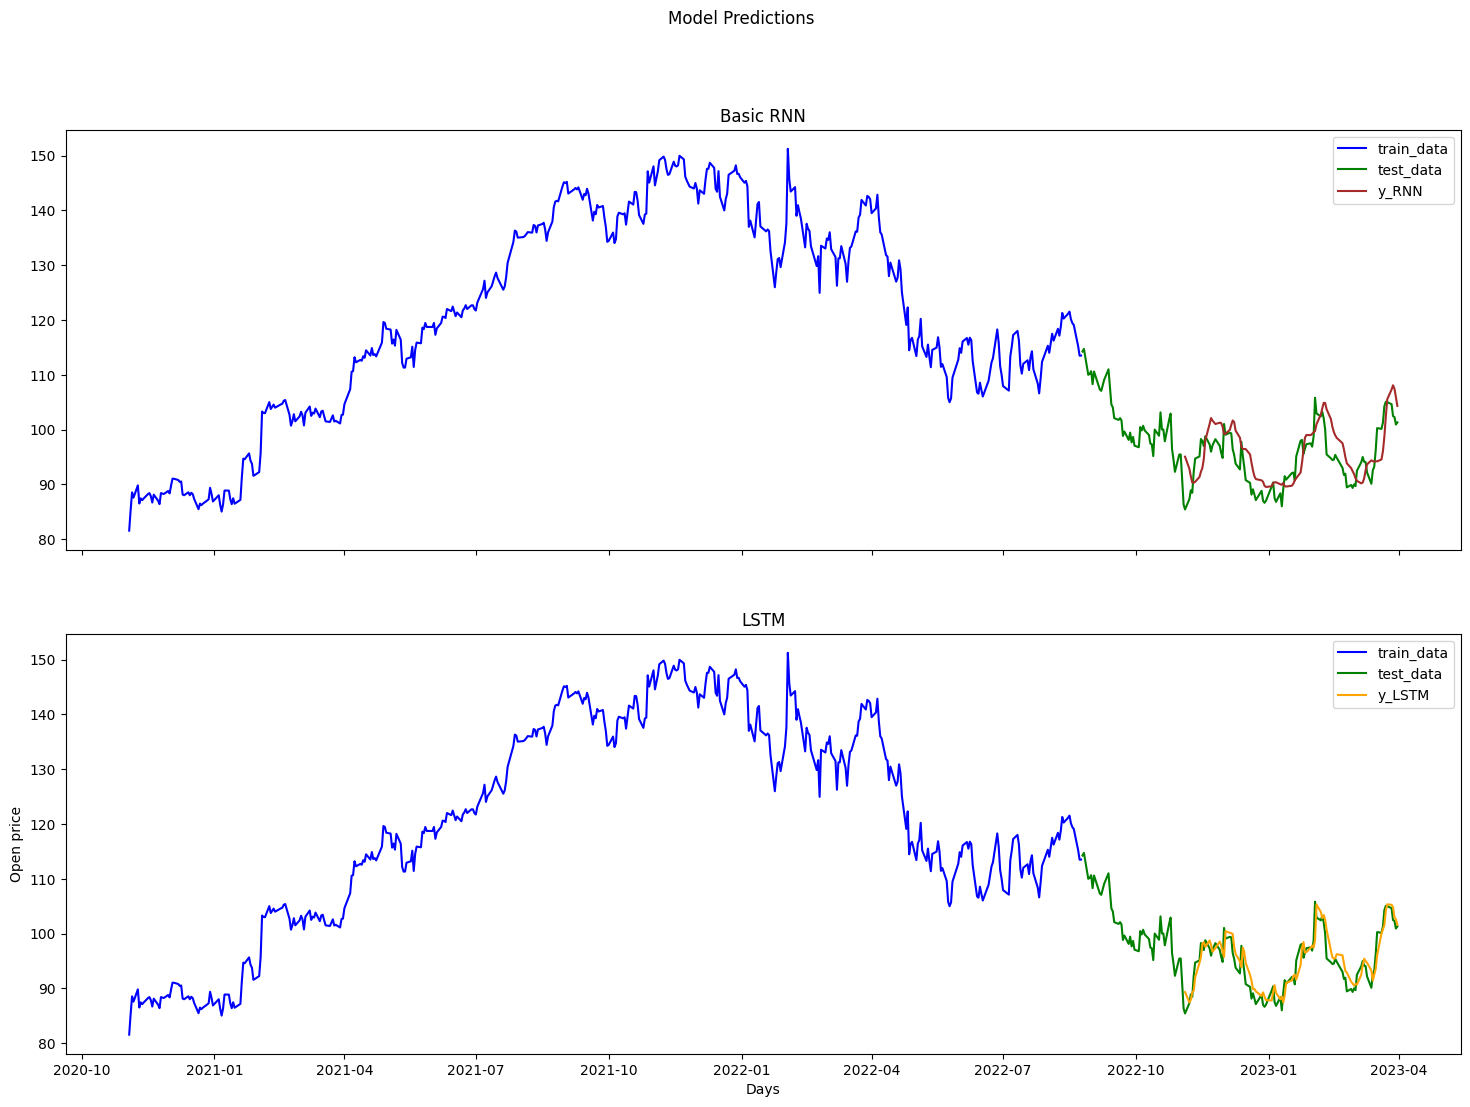

In [38]:
fig, axs = plt.subplots(2,figsize =(18,12),sharex=True, sharey=True)
fig.suptitle('Model Predictions')

#Plot for RNN predictions
axs[0].plot(train_data.index[150:], train_data.Open[150:], label = "train_data", color = "b")
axs[0].plot(test_data.index, test_data.Open, label = "test_data", color = "g")
axs[0].plot(test_data.index[50:], y_RNN_O, label = "y_RNN", color = "brown")
axs[0].legend()
axs[0].title.set_text("Basic RNN")

#Plot for LSTM predictions
axs[1].plot(train_data.index[150:], train_data.Open[150:], label = "train_data", color = "b")
axs[1].plot(test_data.index, test_data.Open, label = "test_data", color = "g")
axs[1].plot(test_data.index[50:], y_LSTM_O, label = "y_LSTM", color = "orange")
axs[1].legend()
axs[1].title.set_text("LSTM")



plt.xlabel("Days")
plt.ylabel("Open price")

plt.show()
